In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_1648169/4057453759.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import sys
import os
import struct
import time
import numpy as np
import h5py
from scipy.stats import pearsonr
from scipy.io import loadmat
from tqdm import tqdm
import pickle
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
root_dir = os.getcwd() + '/'
output_dir = root_dir + "output/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print ("Current dir: %s" % root_dir)

Current dir: /home/pi09pexa/Downloads/manual/


## Load a dataset

In [4]:
nsd_root = "/home/pi09pexa/Downloads/data/"
stim_root = nsd_root + "nsddata_stimuli/stimuli/nsd/"
beta_root = nsd_root + "nsddata_betas/ppdata/"
mask_root = nsd_root + "nsddata/ppdata/"

In [5]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

NameError: name 'subject_data' is not defined

In [ ]:
from nilearn import datasets

# By default 2nd subject will be fetched

# 'func' is a list of filenames: one for each subject
fmri_filename = voxel_mask_full.func[0]

# print basic information on the dataset
print(f"First subject functional nifti images (4D) are at: {fmri_filename}")

In [8]:
from src.file_utility import load_mask_from_nii, view_data

def iterate_roi(group, voxelroi, roimap, group_name=None):
    for k,g in enumerate(group):
        g_name = ('' if group_name is None else group_name[k])
        mask = np.zeros(shape=voxelroi.shape, dtype=bool)
        for i,roi in enumerate(g):
            if group_name is None:
                g_name += roimap[roi] + ('-' if i+1<len(g) else '')
            mask = np.logical_or(mask, voxelroi==roi)
        yield mask, g_name

# Make early visual cortex masks

In [33]:
#subjects = [1, 2, 3, 4, 5, 6, 7, 8]
subjects = [1]
from src.file_utility import load_mask_from_nii, view_data
from src.roi import roi_map, iterate_roi
roi_map = {1: 'V1v', 2: 'V1d', 3: 'V2v', 4: 'V2d', 5: 'V3v', 6: 'V3d', 7: 'hV4', 8: 'VO1', 9: 'VO2', \
           10: 'PHC1', 11: 'PHC2', 12: 'MST', 13: 'hMT', 14: 'LO2', 15: 'LO1', 16: 'V3b', 17: 'V3a', \
           18: 'IPS0', 19: 'IPS1', 20: 'IPS2', 21: 'IPS3', 22: 'IPS4', 23: 'IPS5', 24: 'SPL1', 25: 'FEF',\
           0: 'other'}

In [43]:
#Load HCP
voxel_HCP_full     = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/HCP_MMP1.nii.gz"%(s))

# Initialize the dictionary
roi_map = {
    0: "other",
    1: "V1",
    2: "MST",
    3: "V6",
    4: "V2",
    5: "V3",
    6: "V4",
    7: "V8",
    8: "4",
    9: "3b",
    10: "FEF",
    11: "PEF",
    12: "55b",
    13: "V3A",
    14: "RSC",
    15: "POS2",
    16: "V7",
    17: "IPS1",
    18: "FFC",
    19: "V3B",
    20: "LO1",
    21: "LO2",
    22: "PIT",
    23: "MT",
    24: "A1",
    25: "PSL",
    26: "SFL",
    27: "PCV",
    28: "STV",
    29: "7Pm",
    30: "7m",
    31: "POS1",
    32: "23d",
    33: "v23ab",
    34: "d23ab",
    35: "31pv",
    36: "5m",
    37: "5mv",
    38: "23c",
    39: "5L",
    40: "24dd",
    41: "24dv",
    42: "7AL",
    43: "SCEF",
    44: "6ma",
    45: "7Am",
    46: "7Pl",
    47: "7PC",
    48: "LIPv",
    49: "VIP",
    50: "MIP",
    51: "1",
    52: "2",
    53: "3a",
    54: "6d",
    55: "6mp",
    56: "6v",
    57: "p24pr",
    58: "33pr",
    59: "a24pr",
    60: "p32pr",
    61: "a24",
    62: "d32",
    63: "8BM",
    64: "p32",
    65: "10r",
    66: "47m",
    67: "8Av",
    68: "8Ad",
    69: "9m",
    70: "8BL",
    71: "9p",
    72: "10d",
    73: "8C",
    74: "44",
    75: "45",
    76: "47l",
    77: "a47r",
    78: "6r",
    79: "IFJa",
    80: "IFJp",
    81: "IFSp",
    82: "IFSa",
    83: "p9-46v",
    84: "46",
    85: "a9-46v",
    86: "9-46d",
    87: "9a",
    88: "10v",
    89: "a10p",
    90: "10pp",
    91: "11l",
    92: "13l",
    93: "OFC",
    94: "47s",
    95: "LIPd",
    96: "6a",
    97: "i6-8",
    98: "s6-8",
    99: "43",
    100: "OP4",
    101: "OP1",
    102: "OP2-3",
    103: "52",
    104: "RI",
    105: "PFcm",
    106: "PoI2",
    107: "TA2",
    108: "FOP4",
    109: "MI",
    110: "Pir",
    111: "AVI",
    112: "AAIC",
    113: "FOP1",
    114: "FOP3",
    115: "FOP2",
    116: "PFt",
    117: "AIP",
    118: "EC",
    119: "PreS",
    120: "H",
    121: "ProS",
    122: "PeEc",
    123: "STGa",
    124: "PBelt",
    125: "A5",
    126: "PHA1",
    127: "PHA3",
    128: "STSda",
    129: "STSdp",
    130: "STSvp",
    131: "TGd",
    132: "TE1a",
    133: "TE1p",
    134: "TE2a",
    135: "TF",
    136: "TE2p",
    137: "PHT",
    138: "PH",
    139: "TPOJ1",
    140: "TPOJ2",
    141: "TPOJ3",
    142: "DVT",
    143: "PGp",
    144: "IP2",
    145: "IP1",
    146: "IP0",
    147: "PFop",
    148: "PF",
    149: "PFm",
    150: "PGi",
    151: "PGs",
    152: "V6A",
    153: "VMV1",
    154: "VMV3",
    155: "PHA2",
    156: "V4t",
    157: "FST",
    158: "V3CD",
    159: "LO3",
    160: "VMV2",
    161: "31pd",
    162: "31a",
    163: "VVC",
    164: "25",
    165: "s32",
    166: "pOFC",
    167: "PoI1",
    168: "Ig",
    169: "FOP5",
    170: "p10p",
    171: "p47r",
    172: "TGv",
    173: "MBelt",
    174: "LBelt",
    175: "A4",
    176: "STSva",
    177: "TE1m",
    178: "PI",
    179: "a32pr",
    180: "p24"
}
# dorsal hcp Regions: V3A,V3B,V6,V6A,V7,IPS1
dorsal=[13,19,3,152,16,17]
# ventral hcp Regions: V8,Ventral Visual Complex (VVC), PIT Complex, Fusiform Face Complex (FFC), Ventro-Medial Visual Areas (VMV1, VMV2, VMV3)
ventral=[7,163,22,18,153,154,160]



{1: memmap([False, False, False, ..., False, False, False])}

In [51]:
group_names = ['Ventral', 'Dorsal', 'V3', 'hV4', 'V3ab', 'LO', 'IPS', 'VO', 'PHC', 'MT', 'MST', 'other']
group = [[1,3,5,7],[2,4,6],[5,6], [7], [16, 17], [14, 15], [18,19,20,21,22,23], [8, 9], [10,11], [13], [12], [24,25,0]]
ventral_mask=None
dorsal_mask=None
brain_nii_shape, voxel_mask, voxel_idx, voxel_roi, voxel_ncsnr = {}, {}, {}, {}, {}
trn_subjects=[1]
for k,s in enumerate(trn_subjects):
    print ('--------  subject %d  -------' % s)
    voxel_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask_vcventral_1.0.nii"%s)
    #voxel_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask_nsdgeneral_1.0.nii"%s)
    voxel_roi_full  = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/prf-visualrois.nii.gz"%s)
    voxel_kast_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%(s))
    general_mask_full  = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/nsdgeneral.nii.gz"%(s))
    #ncsnr_full = load_mask_from_nii(beta_root + "subj%02d/func1pt8mm/betas_fithrf_GLMdenoise_RR/ncsnr.nii.gz"%s)
    ###
    brain_nii_shape[s] = voxel_roi_full.shape
    print (brain_nii_shape[s])
    ###
    voxel_roi_mask_full = (voxel_roi_full>0).flatten().astype(bool)
    voxel_joined_roi_full = np.copy(voxel_kast_full.flatten())  # load kastner rois
    voxel_joined_roi_full[voxel_roi_mask_full] = voxel_roi_full.flatten()[voxel_roi_mask_full] # overwrite with prf rois
    ###
    voxel_mask[s]  = np.nan_to_num(voxel_mask_full).flatten().astype(bool)
    voxel_idx[s]   = np.arange(len(voxel_mask[s]))[voxel_mask[s]]
    voxel_roi[s]   = voxel_joined_roi_full[voxel_mask[s]]
    #voxel_ncsnr[s] = ncsnr_full.flatten()[voxel_mask[s]]
        
    print ('full mask length = %d'%len(voxel_mask[s]))
    print ('selection length = %d'%np.sum(voxel_mask[s]))
    
    for roi_mask, roi_name in iterate_roi(group, voxel_roi[s], roi_map, group_name=group_names):
        print ("%d \t: %s" % (np.sum(roi_mask), roi_name))
        if roi_name=="Ventral":
            ventral_mask=roi_mask
        if roi_name=="Dorsal":
            dorsal_mask=roi_mask


--------  subject 1  -------
(81, 104, 83)
full mask length = 699192
selection length = 4657
2761 	: Ventral
1896 	: Dorsal
1187 	: V3
687 	: hV4
0 	: V3ab
0 	: LO
0 	: IPS
0 	: VO
0 	: PHC
0 	: MT
0 	: MST
0 	: other


In [53]:
print ('full mask length = %d'%len(ventral_mask))
print ('selection length = %d'%np.sum(ventral_mask))

full mask length = 4657
selection length = 2761


In [56]:
group_names = ['Ventral', 'Dorsal', 'V3', 'hV4', 'V3ab', 'LO', 'IPS', 'VO', 'PHC', 'MT', 'MST', 'other']
group = [[1,3,5,7],[2,4,6],[5,6], [7], [16, 17], [14, 15], [18,19,20,21,22,23], [8, 9], [10,11], [13], [12], [24,25,0]]

brain_nii_shape, voxel_mask, voxel_idx, voxel_roi, voxel_ncsnr = {}, {}, {}, {}, {}
trn_subjects=[1]
for k,s in enumerate(trn_subjects):
    print ('--------  subject %d  -------' % s)
    voxel_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask_vcventral_1.0.nii"%s)
    #voxel_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask_nsdgeneral_1.0.nii"%s)
    voxel_roi_full  = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/prf-visualrois.nii.gz"%s)
    voxel_kast_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%(s))
    general_mask_full  = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/nsdgeneral.nii.gz"%(s))
    #ncsnr_full = load_mask_from_nii(beta_root + "subj%02d/func1pt8mm/betas_fithrf_GLMdenoise_RR/ncsnr.nii.gz"%s)
    ###
    voxel_roi_full=ventral_mask
    brain_nii_shape[s] = voxel_roi_full.shape
    print (brain_nii_shape[s])
    ###
    voxel_roi_mask_full = (voxel_roi_full>0).flatten().astype(bool)
    voxel_joined_roi_full = np.copy(ventral_mask.flatten())  # load kastner rois
    voxel_joined_roi_full[voxel_roi_mask_full] = voxel_roi_full.flatten()[voxel_roi_mask_full] # overwrite with prf rois
    ###
    voxel_mask[s]  = np.nan_to_num(ventral_mask).flatten().astype(bool)
    voxel_idx[s]   = np.arange(len(voxel_mask[s]))[voxel_mask[s]]
    voxel_roi[s]   = voxel_joined_roi_full[voxel_mask[s]]
    #voxel_ncsnr[s] = ncsnr_full.flatten()[voxel_mask[s]]
        
    print ('full mask length = %d'%len(voxel_mask[s]))
    print ('selection length = %d'%np.sum(voxel_mask[s]))
    
    for roi_mask, roi_name in iterate_roi(group, voxel_roi[s], roi_map, group_name=group_names):
        print ("%d \t: %s" % (np.sum(roi_mask), roi_name))
      


--------  subject 1  -------
(4657,)
full mask length = 4657
selection length = 2761
2761 	: Ventral
0 	: Dorsal
0 	: V3
0 	: hV4
0 	: V3ab
0 	: LO
0 	: IPS
0 	: VO
0 	: PHC
0 	: MT
0 	: MST
0 	: other


In [35]:
print(ventral_mask)
ventral_mask  = ((ventral_mask)>0).flatten().astype(bool)
print(ventral_mask)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [44]:
s=0
voxel_mask[s]  = ventral_mask
voxel_idx[s]   = np.arange(len(voxel_mask[s]))[voxel_mask[s]]
voxel_roi[s]   = voxel_joined_roi_full[voxel_mask[s]]
#voxel_ncsnr[s] = ncsnr_full.flatten()[voxel_mask[s]]
    
print ('full mask length = %d'%len(voxel_mask[s]))
print ('selection length = %d'%np.sum(voxel_mask[s]))

IndexError: boolean index did not match indexed array along axis 0; size of axis is 699192 but size of corresponding boolean axis is 4657

0 1


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

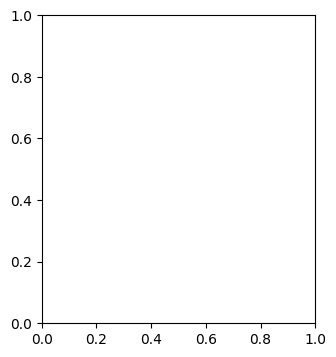

In [57]:
slice_idx = 50
plt.figure(figsize=(12, 4*len(trn_subjects)))
for k,s in enumerate(trn_subjects): 
    subject_dir = output_dir + 'S%02d/'%s
    if not os.path.exists(subject_dir):
        os.makedirs(subject_dir)
    print(k,s)
    volume_brain_mask = view_data(brain_nii_shape[s], voxel_idx[s], np.ones_like(voxel_idx[s]), save_to=subject_dir+"subj%02d_mask"%s)
    volume_brain_roi  = view_data(brain_nii_shape[s], voxel_idx[s], voxel_roi[s], save_to=subject_dir+"subj%02d_roi"%s)
    #ncsnr_volume = view_data(brain_nii_shape[s], voxel_idx[s], voxel_ncsnr[s], save_to=subject_dir+"subj%02d_ncsnr"%s) 
    ##
    plt.subplot(len(trn_subjects),3,3*k+1)
    plt.imshow(volume_brain_mask[:,:,slice_idx], cmap='gray', interpolation='None')
    plt.title('Mask')
    plt.colorbar()
    _=plt.ylabel('Subject %d'%s)
    _=plt.gca().set_xticklabels([])
    _=plt.gca().set_yticklabels([])
    plt.subplot(len(trn_subjects),3,3*k+2)
    plt.imshow(volume_brain_roi[:,:,slice_idx], cmap='jet', interpolation='None')
    plt.clim([0,7])
    plt.title('ROI')
    plt.colorbar()
    _=plt.gca().set_xticklabels([])
    _=plt.gca().set_yticklabels([])
    #plt.subplot(len(trn_subjects),3,3*k+3)
    #plt.imshow(ncsnr_volume[:,:,slice_idx], cmap='hot', interpolation='None')
    #plt.title('SNR')
    #plt.colorbar()
    #_=plt.gca().set_xticklabels([])
    #_=plt.gca().set_yticklabels([])

In [20]:
len(voxel_idx)


1

In [117]:
v1=[[3],]
mask=list(iterate_roi(ventral, voxel_roi_full, roi_map, group_name=None))
print(mask)
mask=[ x[0] for x in mask]
arr = np.array(mask)
general_mask_full = (arr>0).flatten().astype(bool)

voxel_mask = general_mask_full
voxel_idx = np.arange(len(general_mask_full))[voxel_mask]
voxel_roi = arr.flatten()[voxel_mask]

[(array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, F

In [115]:
print(voxel_roi)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

## Example

In [118]:
slice_idx = 50
plt.figure(figsize=(12, 4))
    
volume_brain_mask = view_data(brain_nii_shape, voxel_idx, np.ones_like(voxel_idx), save_to=None)
volume_brain_roi  = view_data(brain_nii_shape, voxel_idx, voxel_roi, save_to=None)
##
plt.subplot(1,3,1)
plt.imshow(volume_brain_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.ylabel('Subject %d'%s)
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.subplot(1,3,2)
plt.imshow(volume_brain_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.clim([0,7])
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

IndexError: index 941423 is out of bounds for axis 0 with size 699192

<Figure size 1200x400 with 0 Axes>

# Make visual cortex masks

In [13]:
roi_map = {1: 'V1v', 2: 'V1d', 3: 'V2v', 4: 'V2d', 5: 'V3v', 6: 'V3d', 7: 'hV4', 8: 'VO1', 9: 'VO2', \
           10: 'PHC1', 11: 'PHC2', 12: 'MST', 13: 'hMT', 14: 'LO2', 15: 'LO1', 16: 'V3b', 17: 'V3a', \
           18: 'IPS0', 19: 'IPS1', 20: 'IPS2', 21: 'IPS3', 22: 'IPS4', 23: 'IPS5', 24: 'SPL1', 25: 'FEF',\
           0: 'other'}

for k,s in enumerate(subjects):
    print ('--------  subject %d  -------' % s)
    voxel_roi_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/prf-visualrois.nii.gz"%s)
    voxel_kast_full     = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%(s))
    general_mask_full  = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/nsdgeneral.nii.gz"%(s))
    ###
    
    brain_nii_shape = voxel_roi_full.shape
    print (brain_nii_shape)

    ###
    voxel_mask_full = (voxel_roi_full>0).flatten().astype(bool)
    voxel_joined_roi_full = np.copy(voxel_kast_full.flatten())  # take the kastner rois
    voxel_joined_roi_full[voxel_mask_full] = voxel_roi_full.flatten()[voxel_mask_full] # overwrite the prf visual rois
    voxel_joined_mask_full = (voxel_joined_roi_full>0).flatten().astype(bool)
    ###
    
    voxel_mask = voxel_joined_mask_full
    voxel_idx = np.arange(len(voxel_joined_mask_full))[voxel_mask]
    voxel_roi = voxel_joined_roi_full[voxel_mask]
        
    print ('(kastner selection length = %d)'%np.sum(voxel_kast_full>0))
    print ('mask selection length = %d'%np.sum(voxel_mask))
    print ('mask total length = %d'%len(voxel_mask))
    _ = view_data(brain_nii_shape, voxel_idx,  np.ones_like(voxel_idx), save_to=mask_root \
                  + "subj%02d/func1pt8mm/brainmask_nsdgeneral_1.0.nii"%s)

--------  subject 1  -------
(81, 104, 83)
(kastner selection length = 11067)
mask selection length = 11930
mask total length = 699192


## Example

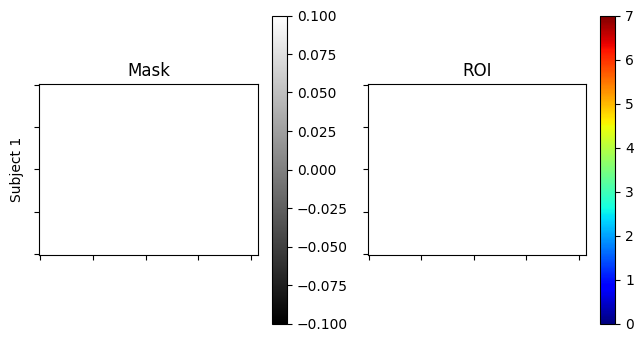

In [14]:
slice_idx = 25
plt.figure(figsize=(12, 4))
    
volume_brain_mask = view_data(brain_nii_shape, voxel_idx, np.ones_like(voxel_idx), save_to=None)
volume_brain_roi  = view_data(brain_nii_shape, voxel_idx, voxel_roi, save_to=None)
##
plt.subplot(1,3,1)
plt.imshow(volume_brain_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.ylabel('Subject %d'%s)
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.subplot(1,3,2)
plt.imshow(volume_brain_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.clim([0,7])
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

# Make whole brain masks
## We need mask that are as tight as possible on the brain. The provided brainmasks are too loose and result in a prohibitive compute cost (almost half of the voxels can be entirely avoided)

In [16]:
subject = 1
brain_r2_full     = load_mask_from_nii(beta_root + "subj%02d/func1pt8mm/betas_fithrf_GLMdenoise_RR/R2.nii.gz"%(subject,))
brain_mask_full   = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask.nii.gz"%(subject))
brain_anat_full   = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/T1_to_func1pt8mm.nii.gz"%(subject))
brain_seg_full    = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/aseg.nii.gz"%(subject))
brain_roi_full    = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%(subject))
general_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/nsdgeneral.nii.gz"%(subject))

brain_nii_shape = brain_mask_full.shape
brain_mask_full   = brain_mask_full.flatten().astype(bool)
general_mask_full = (general_mask_full==1).flatten().astype(bool)

voxel_seg_full = (brain_seg_full!=0).flatten()
voxel_idx_full = np.arange(len(brain_mask_full))
voxel_gen_full = (general_mask_full==1).flatten().astype(bool)
voxel_roi_full = brain_roi_full.flatten()

_ = view_data(brain_nii_shape, voxel_idx_full, brain_roi_full.flatten(), save_to=output_dir + "S%02d/roi_redo.nii"%(subject))
_ = view_data(brain_nii_shape, voxel_idx_full, brain_seg_full.flatten(), save_to=output_dir + "S%02d/aseg_redo.nii"%(subject))
_ = view_data(brain_nii_shape, voxel_idx_full, brain_anat_full.flatten(), save_to=output_dir + "S%02d/anat_redo.nii"%(subject))

voxel_seg_brain = voxel_seg_full[brain_mask_full]
voxel_idx_brain = voxel_idx_full[brain_mask_full]
voxel_roi_brain = voxel_roi_full[brain_mask_full]
voxel_gen_brain = voxel_gen_full[brain_mask_full]

voxel_seg_general = voxel_seg_full[general_mask_full]
voxel_idx_general = voxel_idx_full[general_mask_full]
voxel_roi_general = voxel_roi_full[general_mask_full]

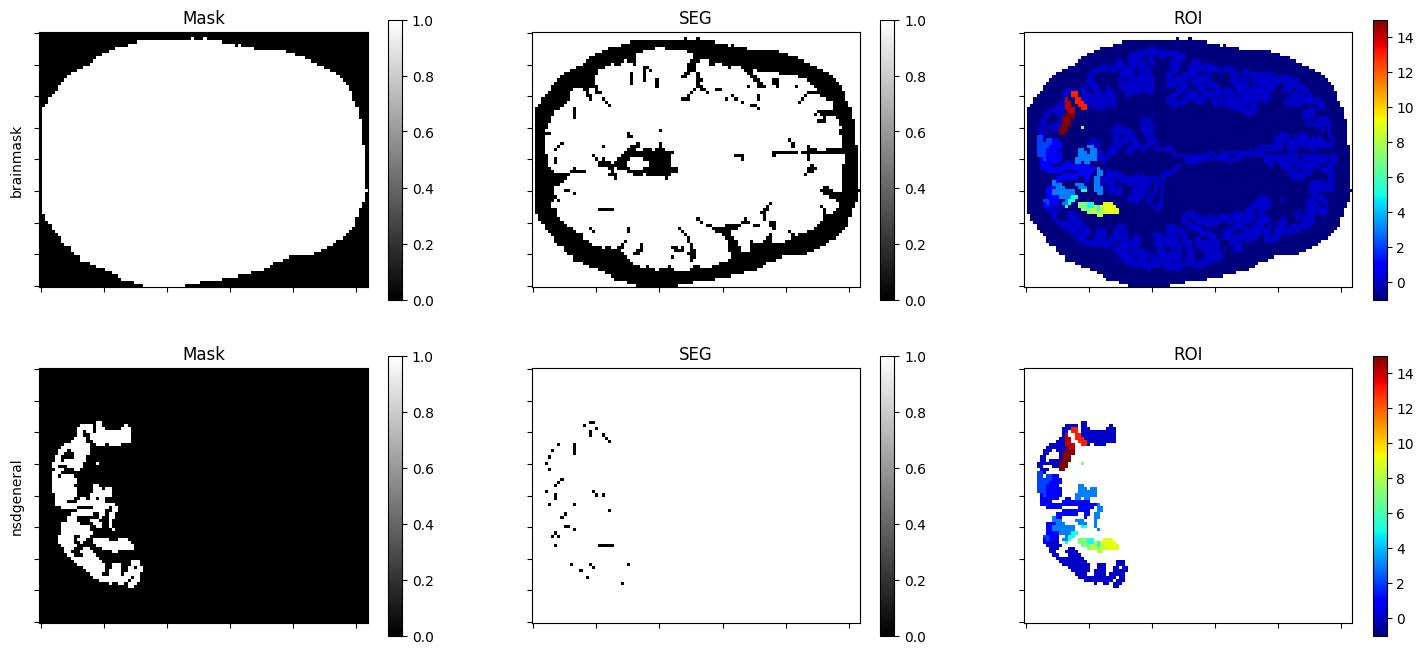

In [17]:
volume_brain_mask = view_data(brain_nii_shape, voxel_idx_full, brain_mask_full)
volume_brain_seg  = view_data(brain_nii_shape, voxel_idx_brain, voxel_seg_brain)
volume_brain_roi  = view_data(brain_nii_shape, voxel_idx_brain, voxel_roi_brain)

volume_general_mask = view_data(brain_nii_shape, voxel_idx_full, general_mask_full)
volume_general_seg  = view_data(brain_nii_shape, voxel_idx_general, voxel_seg_general)
volume_general_roi  = view_data(brain_nii_shape, voxel_idx_general, voxel_roi_general)

slice_idx = 40
fig = plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
plt.imshow(volume_brain_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.ylabel('brainmask')
plt.subplot(2,3,2)
plt.imshow(volume_brain_seg[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('SEG')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.subplot(2,3,3)
plt.imshow(volume_brain_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.subplot(2,3,4)
plt.imshow(volume_general_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.ylabel('nsdgeneral')
plt.subplot(2,3,5)
plt.imshow(volume_general_seg[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('SEG')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.subplot(2,3,6)
plt.imshow(volume_general_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

In [18]:
tight_mask = np.logical_or(np.logical_or(voxel_seg_full, voxel_gen_full), voxel_roi_full>=0)

voxel_idx_tight = voxel_idx_full[tight_mask]
voxel_roi_tight = voxel_roi_full[tight_mask]

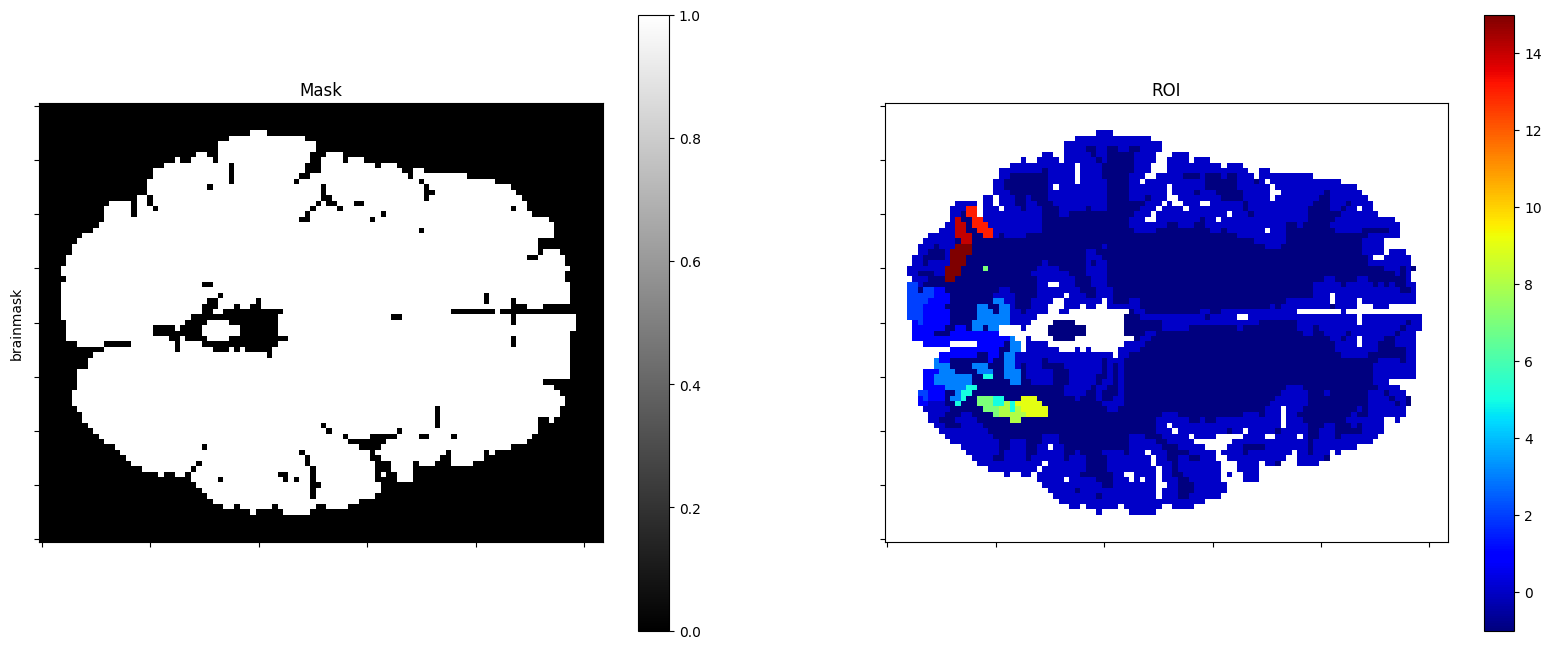

In [19]:
volume_tight_mask = view_data(brain_nii_shape, voxel_idx_full, tight_mask)
volume_tight_roi  = view_data(brain_nii_shape, voxel_idx_tight, voxel_roi_tight)

slice_idx = 40
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(volume_tight_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.ylabel('brainmask')
plt.subplot(1,2,2)
plt.imshow(volume_tight_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

In [20]:
print ('tight masks voxel coverage = %d'%np.sum(tight_mask))
print ('original mask voxel coverage = %d'%np.sum(brain_mask_full))

tight masks voxel coverage = 206329
original mask voxel coverage = 370503


## Let's inflate the tight mask just a tiny bit to fill the ugly holes

In [21]:
def inflate1d(x):
    y = x.astype(np.float32)
    return 1.*y + 0.5*np.roll(y,-1,axis=0) + 0.5*np.roll(y,1,axis=0)

def inflate2d(x):
    y = inflate1d(x)
    return 1.*y + 0.5*np.roll(y,-1,axis=1) + 0.5*np.roll(y,1,axis=1)

def inflate3d(x):
    y = inflate2d(x)
    return 1.*y + 0.5*np.roll(y,-1,axis=2) + 0.5*np.roll(y,1,axis=2)

In [22]:
volume_inflated_mask = inflate3d(volume_tight_mask)>=1.

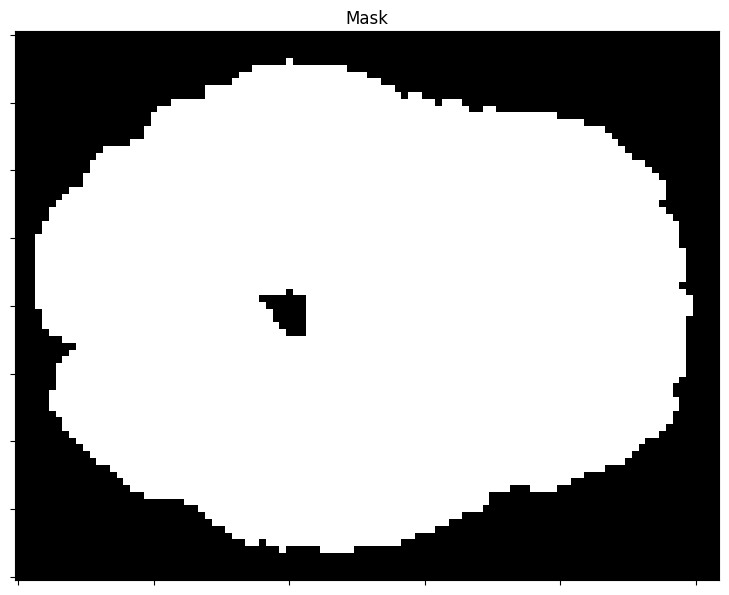

In [23]:
slice_idx = 40
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(volume_inflated_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

In [24]:
print ('tight masks voxel coverage = %d'%np.sum(tight_mask))
print ('inflated tight masks voxel coverage = %d'%np.sum(volume_inflated_mask))
print ('original mask voxel coverage = %d'%np.sum(brain_mask_full))

tight masks voxel coverage = 206329
inflated tight masks voxel coverage = 238292
original mask voxel coverage = 370503


In [25]:
inflated_mask = volume_inflated_mask.flatten()

voxel_idx_inflated = voxel_idx_full[inflated_mask]
voxel_roi_inflated = voxel_roi_full[inflated_mask]

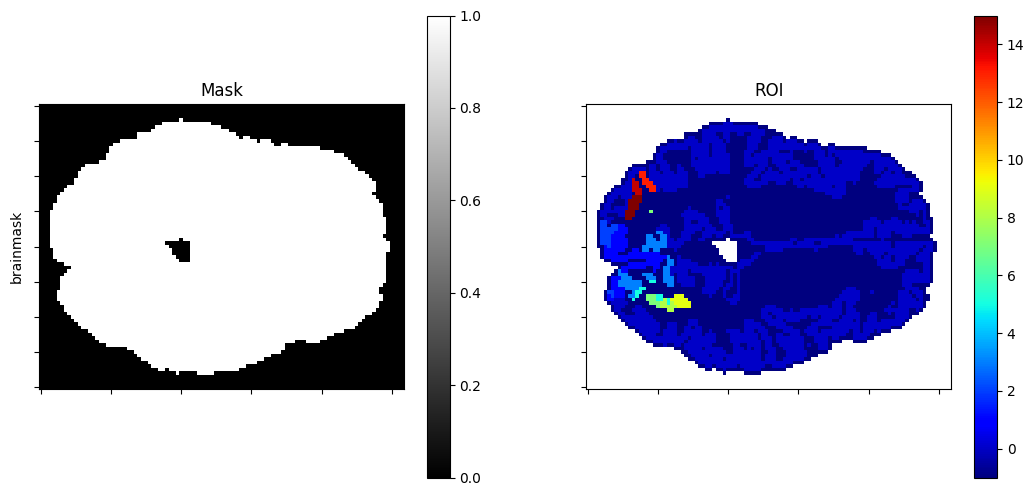

In [26]:
volume_inflated_mask = view_data(brain_nii_shape, voxel_idx_full, inflated_mask)
volume_inflated_roi  = view_data(brain_nii_shape, voxel_idx_inflated, voxel_roi_inflated)

slice_idx = 40
fig = plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(volume_inflated_mask[:,:,slice_idx], cmap='gray', interpolation='None')
plt.title('Mask')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])
plt.ylabel('brainmask')
plt.subplot(1,3,2)
plt.imshow(volume_inflated_roi[:,:,slice_idx], cmap='jet', interpolation='None')
plt.title('ROI')
plt.colorbar()
_=plt.gca().set_xticklabels([])
_=plt.gca().set_yticklabels([])

# Create slightly inflated mask for all subjects

In [27]:
for s in subjects:
    print ('subject = %d' % s)
    brain_mask_full   = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/brainmask.nii.gz"%s)
    brain_seg_full    = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/aseg.nii.gz"%s)
    brain_roi_full    = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/Kastner2015.nii.gz"%s)
    general_mask_full = load_mask_from_nii(mask_root + "subj%02d/func1pt8mm/roi/nsdgeneral.nii.gz"%s)
    
    brain_nii_shape = brain_mask_full.shape
    brain_mask_full   = brain_mask_full.flatten().astype(bool)
    general_mask_full = (general_mask_full==1).flatten().astype(bool)

    voxel_seg_full = (brain_seg_full!=0).flatten()
    voxel_idx_full = np.arange(len(brain_mask_full))
    voxel_gen_full = (general_mask_full==1).flatten().astype(bool)
    voxel_roi_full = brain_roi_full.flatten()
    ###
    tight_mask = np.logical_or(np.logical_or(voxel_seg_full, voxel_gen_full), voxel_roi_full>=0)
    volume_tight_mask = view_data(brain_nii_shape, voxel_idx_full, tight_mask)
    volume_inflated_mask = inflate3d(volume_tight_mask)>=1.
    inflated_mask = volume_inflated_mask.flatten()
    ###
    print ("   tight  \t<  inflated  \t<  original")
    print ("   %d  \t<  %d  \t<  %d"%(np.sum(tight_mask), np.sum(volume_inflated_mask.flatten()), np.sum(brain_mask_full.flatten())))
    _ = view_data(brain_nii_shape, voxel_idx_full, inflated_mask, save_to=mask_root + "subj%02d/func1pt8mm/brainmask_inflated_1.0.nii"%s)

subject = 1
   tight  	<  inflated  	<  original
   206329  	<  238292  	<  370503
